## Definindo funções

In [31]:
## adapted from https://exowanderer.medium.com/bayes-to-mcmc-with-examples-in-python-4a2da80cc1

from plotly import express as px
from plotly import graph_objs as go

def metropolis_hasting_iterator(curr_state, verbose=False):
    
    proposal = np.random.normal(curr_state, 0.5)
    
    l_curr = np.exp(-curr_state**2 / 2) / np.sqrt(2 * np.pi)
    l_prop = np.exp(-proposal**2 / 2) / np.sqrt(2 * np.pi)
    accept_prob = l_prop / l_curr # max(., 1) ??
    accept_thresh = np.random.uniform(0,1)

    if verbose:
        print(
            proposal,
            l_prop,
            accept_prob,
            accept_thresh,
            accept_prob > accept_thresh
        )

    if accept_prob > accept_thresh:
        return proposal

    return curr_state


def mcmc(initial_state=0, n_samples=1, verbose=False):
    chain = []
    curr_state = initial_state
    for _ in range(n_samples):
        curr_state = metropolis_hasting_iterator(
            curr_state,
            verbose=verbose
        )
        chain.append(curr_state)

    return chain


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_trace(p1, p2, p3, p_name1='parameter', p_name2='parameter', p_name3='parameter'):
  """Plot the trace and posterior of a parameter."""
  
  plt.figure(figsize=(6,11))
    
  # Plotting
    
  plt.subplot(3,1,1)

  mean = np.mean(p1)
  plt.hist(p1, 30, density=True); sns.kdeplot(p1, shade=True)
  plt.xlabel(p_name1)
  plt.ylabel('densidade')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='média')

  mean = np.mean(p2)
  plt.subplot(3,1,2)
  plt.hist(p2, 30, density=True); sns.kdeplot(p2, shade=True)
  plt.xlabel(p_name2)
  plt.ylabel('densidade')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='média')

  mean = np.mean(p3)
  plt.subplot(3,1,3)
  plt.hist(p3, 30, density=True); sns.kdeplot(p3, shade=True)
  plt.xlabel(p_name3)
  plt.ylabel('densidade')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='média')

    
  plt.savefig("figs/amostras_MCMC")

In [37]:
import numpy as np

np.random.seed(42)
initial_state = 5.0
n_samples = 450

chain = mcmc(
    initial_state=initial_state,
    n_samples=n_samples,
    verbose=False
)

/tmp/ipykernel_24313/1277524323.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plt.hist(p1, 30, density=True); sns.kdeplot(p1, shade=True)
/tmp/ipykernel_24313/1277524323.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plt.hist(p2, 30, density=True); sns.kdeplot(p2, shade=True)
/tmp/ipykernel_24313/1277524323.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plt.hist(p3, 30, density=True); sns.kdeplot(p3, shade=True)


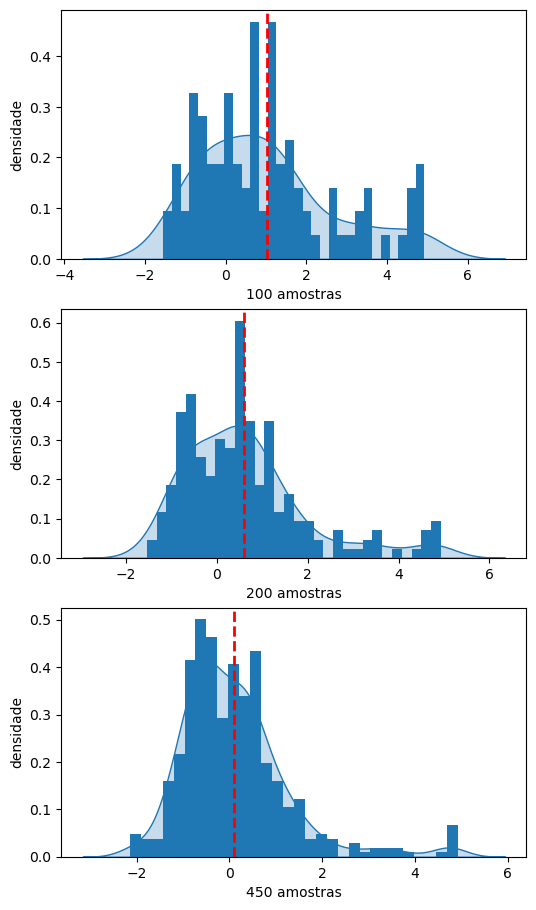

In [38]:
plot_trace(chain[1:100], chain[1:200], chain[1:450], p_name1='100 amostras', p_name2='200 amostras', p_name3='450 amostras')

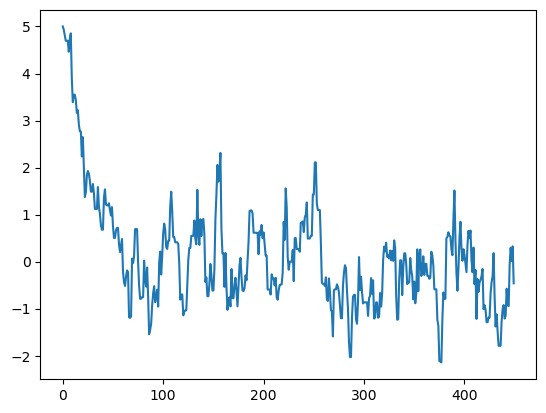

In [35]:
import matplotlib.pyplot as plt
plt.plot(chain)

Seja h = x em 
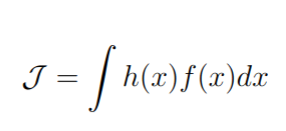

entao o a integral resultante é o valor esperado da normal, e deve ser zero

In [5]:
approx = sum(chain)/len(chain)
approx

0.11334456225051126

## Calculando posteriori

Agora vou usar a o passeio simulado pra calcular uma posteriori

Considere o problema de calcular $P(\theta | x) = \dfrac{P(x|\theta)\pi(\theta)}{P(x|\theta)}$. Seja a priori $\pi \sim N(1, 1)$

Usando resultados conhecidos do estudo de prioris conjugadas, teremos (no caso de variância $\sigma^2$ dos x conhecida, e de media e variancia $\mu_0$ e $\sigma^2_0$ da priori $\pi(\theta) \sim N(\mu_0, \sigma^2_0)$) $P(\theta|x) \sim N \left(\dfrac{\sigma^2 \mu_0 + nv^2_0 \bar{x}_n}{\sigma^2 + nv^2_0}, \dfrac{\sigma^2 v^2_0}{\sigma^2 + n v^2_0} \right)$

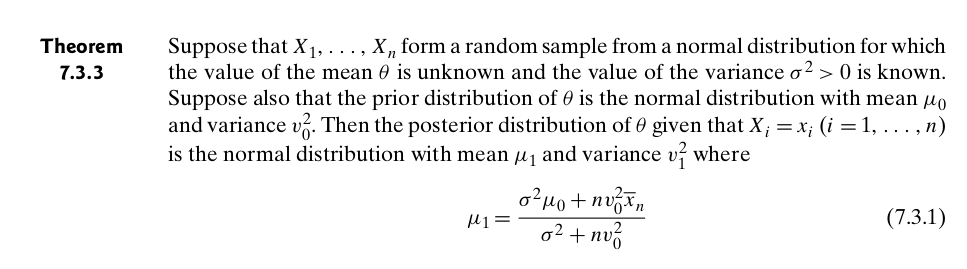
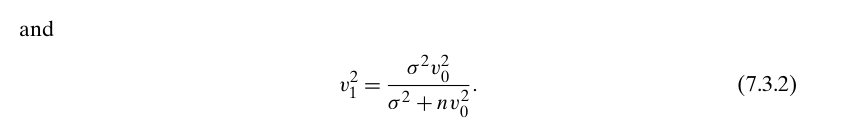

## Parâmetros da posteriori conjugada

In [125]:
## sample parameters
# mean is unknown, but was defined as 0
sigma_square = 1

## priori parameters: theta ~ N(mu_0, v_0_square)
mu_0 = 1
v_0_square = 1

n1 = 100
n2 = 200
n3 = 450



mean1 = (sigma_square * mu_0 + n1*v_0_square * np.mean(chain[1:n1]))/(sigma_square + n1*v_0_square)
v_1_square = (sigma_square * v_0_square)/(sigma_square + n_samples * v_0_square)

mean2 = (sigma_square * mu_0 + n2*v_0_square * np.mean(chain[1:n2]))/(sigma_square + n2*v_0_square)
mean3 = (sigma_square * mu_0 + n3*v_0_square * np.mean(chain[1:n3]))/(sigma_square + n3*v_0_square)



print("posteriori mean: ", mu_1)
print("posteriori variance", v_1_square)

posteriori mean:  0.11531053883088709
posteriori variance 0.0022172949002217295


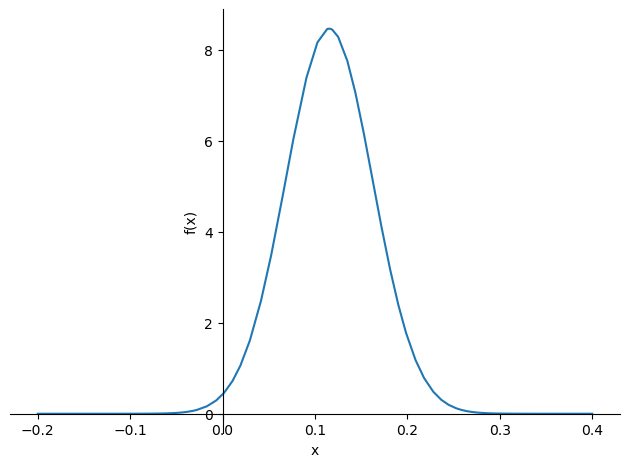

In [44]:
from sympy import *

from sympy.plotting import plot

x = Symbol('x')
conjugate_posteriori = Function('conjugate_posteriori')

conjugate_posteriori = 1/((v_1_square*2*pi)**(1/2))*exp(-(1/2)*(1/v_1_square)*(x - mu_1)**2)

pn = plot(conjugate_posteriori, (x, -0.2, 0.4),  show=False)
pn.show()


## Parâmetros da posteriori via MCMC

Mas se a priori nao fosse conjugada, podemos avaliar a posteriori calculando a verossimilhança dos dados, multiplicando pela priori e normalizando pela marginalização dos dados. O desafio é calcular a marginalização dos dados, e pode ser aproximada usando MCMC:

In [91]:
from sympy import *

# defining symbols and funtions
theta = Symbol('theta')
Pi = Function('Pi')
L = Function('L')

L = theta**2
2*L

L.subs(theta, 4) 

## aqui tem que cortar coisas que eram só teste

16

In [92]:
## defining priori symbolically

Pi = 1/((sigma_square*2*pi)**(1/2))*exp(-(1/2)*(1/sigma_square)*(theta - mu_0)**2)

In [93]:
from sympy.plotting import plot

p1 = plot(Pi, show=False)
p_aux = plot_implicit(Eq(x, mu_1), show = False)
p1.append(p_aux[0])

p1.show()


SympifyError: SympifyError: [-0.1]

In [104]:
## defining likelihood symbolically and iteratively
from tqdm import tqdm

n_samples1 = 100
n_samples2 = 200
n_samples3 = 450

L1 = 1
for element in tqdm(chain[1:n_samples1]):
    L1 = L1 * exp((1/(-2*sigma_square))*(element - theta)**2)
L1 = L1 * (2*pi*sigma_square)**(-n_samples1/2)
                              
L2 = 1
for element in tqdm(chain[1:n_samples2]):
    L2 = L2 * exp((1/(-2*sigma_square))*(element - theta)**2)
L2 = L2 * (2*pi*sigma_square)**(-n_samples2/2)
                              
L3 = 1
for element in tqdm(chain[1:n_samples3]):
    L3 = L3 * exp((1/(-2*sigma_square))*(element - theta)**2)
L3 = L3 * (2*pi*sigma_square)**(-n_samples3/2)
                              

100%|████████████████████████████████████████| 449/449 [00:03<00:00, 118.98it/s]


In [108]:
## integrating marginalization via MCMC

likelihood1 = []
for i in tqdm(range(1, len(chain[1:n_samples1]))):
    likelihood1.append(L.subs(theta, chain[i]))
integral1 = np.sum(likelihood1)/n_samples1

likelihood2 = []
for i in tqdm(range(1, len(chain[1:n_samples2]))):
    likelihood2.append(L.subs(theta, chain[i]))
integral2 = np.sum(likelihood2)/n_samples2

likelihood3 = []
for i in tqdm(range(1, len(chain[1:n_samples3]))):
    likelihood3.append(L.subs(theta, chain[i]))
integral3 = np.sum(likelihood3)/n_samples3

100%|█████████████████████████████████████████| 448/448 [01:41<00:00,  4.40it/s]


In [109]:
## evaluating posterioris

posteriori1 = Pi*L1/integral1
posteriori2 = Pi*L2/integral2
posteriori3 = Pi*L3/integral3

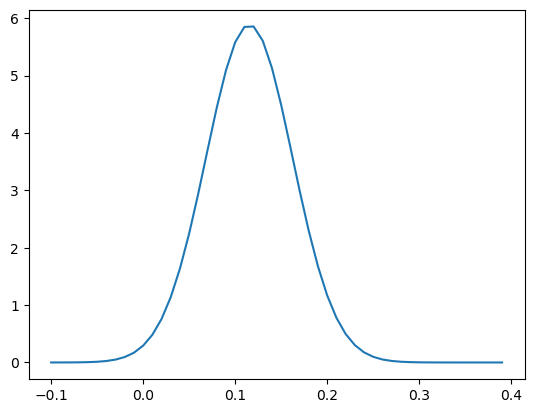

In [110]:
plt.plot(x, y)

In [123]:
## tranforming sympy function to something plotable in matplotlib

x1 = []
y1 = []
it = range(-10, 130, 1)


for i in tqdm(it):
    x1.append(i/100)
    y1.append(posteriori1.subs(theta, i/100))

x2 = []
y2 = []

for i in tqdm(it):
    x2.append(i/100)
    y2.append(posteriori2.subs(theta, i/100))

x3 = []
y3 = []

for i in tqdm(it):
    x3.append(i/100)
    y3.append(posteriori3.subs(theta, i/100))


100%|█████████████████████████████████████████| 140/140 [00:39<00:00,  3.59it/s]


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_posteriori(x1, y1, x2, y2, x3, y3, p_name1='parameter', p_name2='parameter', p_name3='parameter', mean1 = 0, mean2 = 0, mean3 = 0):
  """Plot the trace and posterior of a parameter."""
  
  plt.figure(figsize=(6,11))
    
  # Plotting
    
  plt.subplot(3,1,1)

  plt.plot(x1, y1)
  plt.xlabel(p_name1)
  plt.ylabel('densidade')
  plt.axvline(mean1, color='r', lw=2, linestyle='--',label='média')

  plt.subplot(3,1,2)
  plt.plot(x2, y2)
  plt.xlabel(p_name2)
  plt.ylabel('densidade')
  plt.axvline(mean2, color='r', lw=2, linestyle='--',label='média')

  plt.subplot(3,1,3)
  plt.plot(x3, y3)
  plt.xlabel(p_name3)
  plt.ylabel('densidade')
  plt.axvline(mean3, color='r', lw=2, linestyle='--',label='média')

    
  plt.savefig("figs/posterioris")

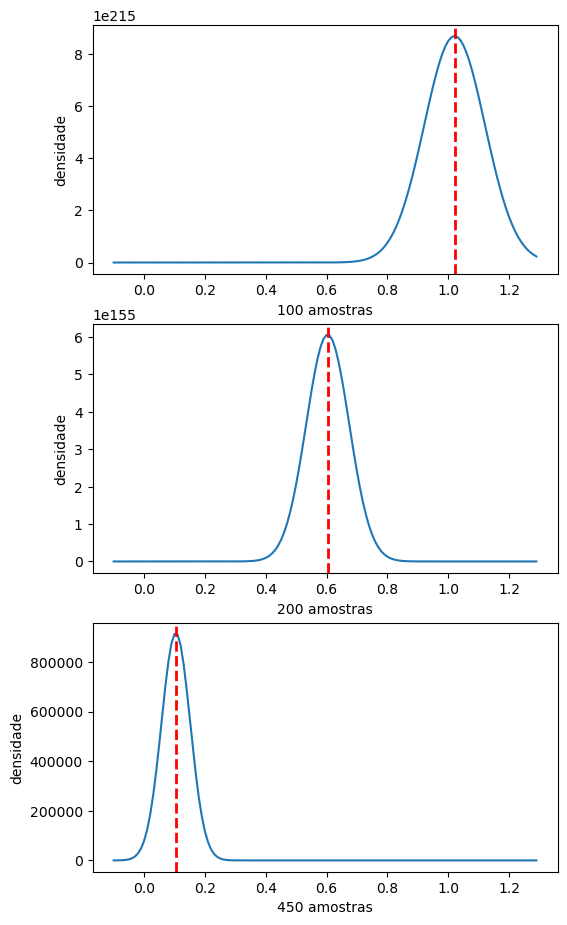

In [128]:
plot_posteriori(x1, y1, x2, y2, x3, y3, p_name1='100 amostras', p_name2='200 amostras', p_name3='450 amostras', mean1 = mean1, mean2 = mean2, mean3 = mean3)